<h1 align="center"><b>CS116.M11 - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>BÀI TẬP 9 - NGÀY 09/11/2021</b></h1>

# **Thông tin sinh viên**

1. ***MSSV:*** 19520214
2. ***Họ tên:*** Cao Hưng Phú
3. ***Bài tập:*** Bài tập 9
4. ***Ngày thực hiện:*** 09/11/2021

# **Bài làm**

### **Các hàm và thư viện cần thiết**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.simplefilter("ignore")

### **Bước 1: Load dataset MNIST**

In [ ]:
# Load dataset

(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Chia train -> train + val

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=14)

In [ ]:
# Thông tin dataset

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (48000, 28, 28)
y_train: (48000,)
X_val: (12000, 28, 28)
y_val: (12000,)
X_test: (10000, 28, 28)
y_test: (10000,)


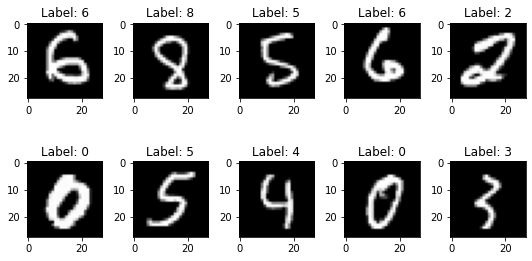

In [ ]:
# Hiển thị dataset

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

### **Bước 2: Cài đặt mạng CNN**

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Add
from keras.models import load_model, Model

In [ ]:
class CNN:
  def __init__(self):
    self.model = None

  def build(self, input_dim):

    input = Input(shape = input_dim)

    C1 = Conv2D(8, (3, 3), padding='same', activation='relu')(input)
    P1 = MaxPooling2D(pool_size=(2, 2), padding='same')(C1)

    C2 = Conv2D(8, (3, 3), padding='same', activation='relu')(P1)
    C3 = Conv2D(8, (3, 3), padding='same', activation='relu')(C2)
    
    C4 = Add()([C3, P1])

    C5 = Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu')(C4)
    C6 = Conv2D(16, (3, 3), padding='same', activation='relu')(C5)
    C7 = Conv2D(16, (3, 3), padding='same', activation='relu')(C6)

    C8 = Add()([C7, C5])

    P2 = AveragePooling2D()(C8)
    flat = Flatten()(P2)
    F1 = Dense (400, activation='sigmoid', use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F1)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

  def train(self, X_train, y_train, X_val, y_val):
    self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

  def summary(self):
    self.model.summary()
    
  def predict(self, X_test):
    return self.model.predict(X_test)

In [ ]:
cnn = CNN()
cnn.build((28, 28, 1))
cnn.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 28, 28, 8)    80          input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 14, 14, 8)    0           conv2d_24[0][0]                  
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 14, 14, 8)    584         max_pooling2d_4[0][0]            
____________________________________________________________________________________________

In [ ]:
cnn.train(X_train, y_train, X_val, y_val)

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.3885 - accuracy: 0.8994 - val_loss: 0.1385 - val_accuracy: 0.9617
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0974 - accuracy: 0.9723 - val_loss: 0.1035 - val_accuracy: 0.9698
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0720 - accuracy: 0.9792 - val_loss: 0.0778 - val_accuracy: 0.9763
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.0677 - val_accuracy: 0.9794
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0519 - accuracy: 0.9845 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.9818
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0684 - val_accuracy: 0.9793
Epoch 

### **Bước 3: Test**

In [ ]:
# Predict

class_name = [i for i in range(10)]
y_pre = cnn.predict(X_test)
y_pre_cvt = [class_name[np.argmax(x)] for x in y_pre]

In [ ]:
# Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre_cvt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



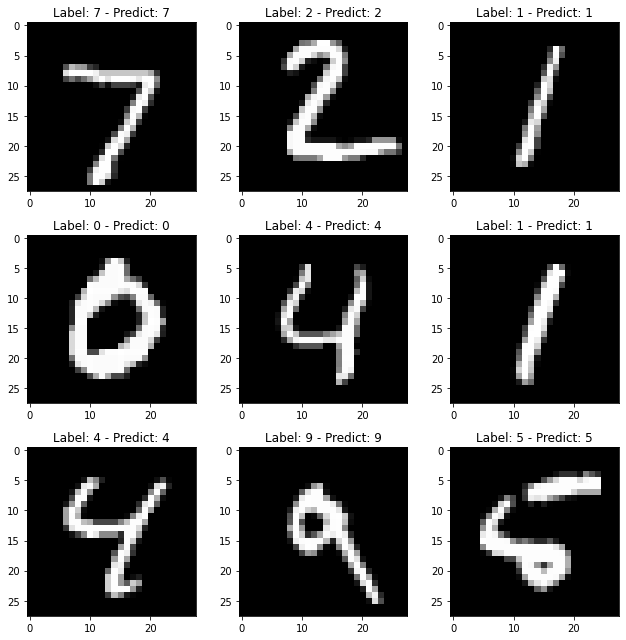

In [ ]:
# Hiển thị kết quả test

num_row = 3
num_col = 3
fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title('Label: {} - Predict: {}'.format(y_test[i], y_pre_cvt[i]))
plt.tight_layout()
plt.show()